In [34]:
!pip install seaborn
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv("sincomas.csv")

In [3]:
df.head(10)

,Car Make,Car Model,Year,Engine Size (L),Horsepower,Torque (lb-ft),0-60 MPH Time (seconds),Price (in USD)
0,Porsche,911,2022,3,379,331,4,101200
1,Lamborghini,Huracan,2021,5.2,630,443,2.8,274390
2,Ferrari,488 GTB,2022,3.9,661,561,3,333750
3,Audi,R8,2022,5.2,562,406,3.2,142700
4,McLaren,720S,2021,4,710,568,2.7,298000
5,BMW,M8,2022,4.4,617,553,3.1,130000
6,Mercedes-Benz,AMG GT,2021,4,523,494,3.8,118500
7,Chevrolet,Corvette,2021,6.2,490,465,2.8,59900
8,Ford,Mustang Shelby GT500,2022,5.2,760,625,3.5,81000
9,Nissan,GT-R Nismo,2021,3.8,600,481,2.5,212000


In [4]:
df.info

<bound method DataFrame.info of          Car Make Car Model  Year Engine Size (L) Horsepower Torque (lb-ft)  \
0         Porsche       911  2022               3        379            331   
1     Lamborghini   Huracan  2021             5.2        630            443   
2         Ferrari   488 GTB  2022             3.9        661            561   
3            Audi        R8  2022             5.2        562            406   
4         McLaren      720S  2021               4        710            568   
...           ...       ...   ...             ...        ...            ...   
1002   Koenigsegg     Jesko  2022               5       1280           1106   
1003        Lotus     Evija  2021  Electric Motor       1972           1254   
1004      McLaren     Senna  2021               4        789            590   
1005       Pagani    Huayra  2021               6        764            738   
1006        Rimac    Nevera  2021  Electric Motor       1888           1696   

     0-60 MPH Time 

In [4]:
max_price = df['Price (in USD)'].max()
print(f"\nEl preu mes alt es de: {max_price}")


El preu mes alt es de: 5200000


In [5]:
df['Price (in USD)'] = df['Price (in USD)'].replace(to_replace = "," , value = "")

#df['Price (in USD)'] = df['Price (in USD)'].replace({",", ""})

#df['Price (in USD)'] <- df['Price (in USD)'].replace(",","")

([<matplotlib.patches.Wedge at 0x77032ada80a0>,
 [Text(-1.0855056610114495, 0.17798162801844522, 'Bugatti'),
  Text(-0.80940850816272, -0.7448878216978717, 'Lamborghini'),
  Text(-0.10496045291685227, -1.0949809602561542, 'Pagani'),
  Text(0.6347953910412639, -0.8983511626935031, 'W Motors'),
  Text(1.0520271855845897, -0.321307953202169, 'Koenigsegg'),
  Text(1.050545292510305, 0.3261205120571809, 'Lotus'),
  Text(0.7285284771339736, 0.8241639751923482, 'Pininfarina'),
  Text(0.23915899999606519, 1.0736866268706537, 'Rimac'),
  Text(-0.28804352352262796, 1.0616171289860905, 'McLaren'),
  Text(-0.6978629486957653, 0.8502866015865779, 'Porsche')],
 [Text(-0.592093996915336, 0.09708088801006101, '17.0%'),
  Text(-0.4414955499069381, -0.40630244819883904, '11.8%'),
  Text(-0.057251156136464865, -0.5972623419579022, '11.5%'),
  Text(0.346252031477053, -0.4900097251055471, '11.1%'),
  Text(0.5738330103188671, -0.17525888356481945, '9.8%'),
  Text(0.5730247050056209, 0.17788391566755318, '9.

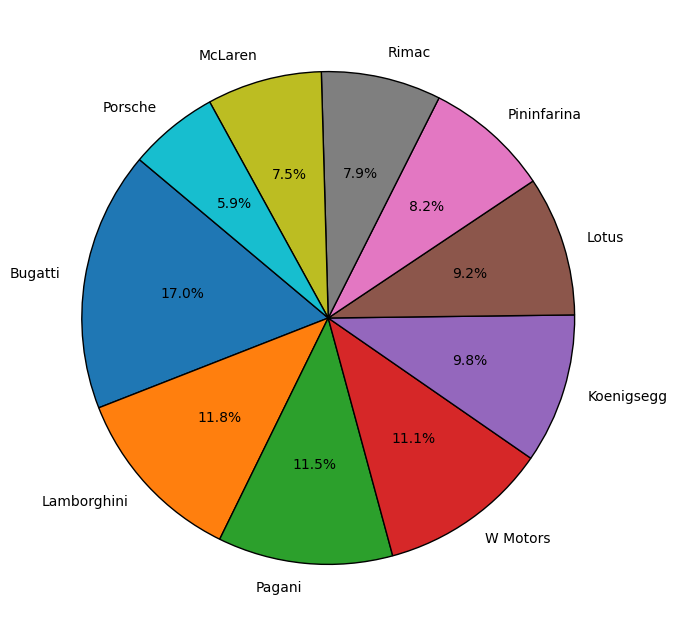

In [6]:
marcasOrdenadas = df.groupby('Car Make')['Price (in USD)'].max().sort_values(ascending=False)
marcasCaras = marcasOrdenadas.head(10)
plt.figure(figsize=(8, 8))
plt.pie(marcasCaras, labels=marcasCaras.index, 
        autopct='%1.1f%%', startangle=140, wedgeprops={'edgecolor': 'black'})


In [31]:
df['0-60 MPH Time (seconds)'] = pd.to_numeric(df['0-60 MPH Time (seconds)'])

coches_rapidos = df[['Car Make', 'Car Model', '0-60 MPH Time (seconds)', 'Price (in USD)']].nsmallest(10, '0-60 MPH Time (seconds)')

print(coches_rapidos)




     Car Make Car Model  0-60 MPH Time (seconds)  Price (in USD)
387     Rimac     C_Two                     1.80         2400000
439     Rimac     C_Two                     1.80         2400000
26      Rimac    Nevera                     1.85         2400000
278     Rimac     C_Two                     1.85         2400000
352     Rimac    Nevera                     1.85         2400000
686     Rimac     C_Two                     1.85         2400000
824     Rimac    Nevera                     1.85         2400000
986     Rimac    Nevera                     1.85         2400000
1006    Rimac    Nevera                     1.85         2400000
99      Tesla  Roadster                     1.90          200000


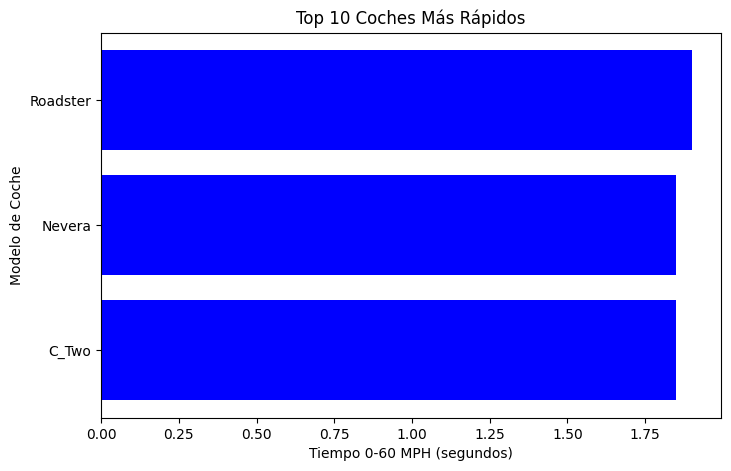

In [39]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 5))
plt.barh(coches_rapidos["Car Model"], coches_rapidos["0-60 MPH Time (seconds)"], color='blue')

plt.xlabel("Tiempo 0-60 MPH (segundos)")
plt.ylabel("Modelo de Coche")
plt.title("Top 10 Coches Más Rápidos")


plt.show()

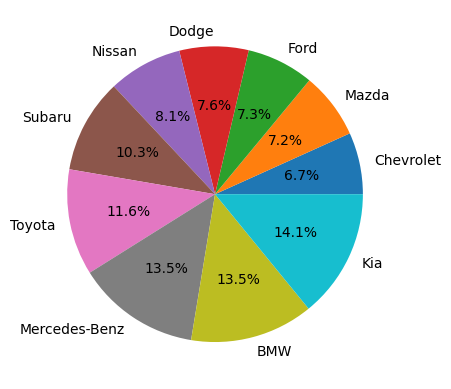

In [41]:
marcas_baratas = df.groupby('Car Make')['Price (in USD)'].min().sort_values(ascending=True).head(10)
plt.pie(marcas_baratas, labels=marcas_baratas.index, autopct='%1.1f%%')
plt.show()


In [46]:
df['Engine Size (L)'] = pd.to_numeric(df['Engine Size (L)'], errors='coerce')

coches_mas_consumen = df[['Car Make', 'Car Model', 'Engine Size (L)', 'Price (in USD)']]\
    .nlargest(10, 'Engine Size (L)')
print(coches_mas_consumen)


    Car Make  Car Model  Engine Size (L)  Price (in USD)
159    Dodge      Viper              8.4          120000
369    Dodge      Viper              8.4          118795
405    Dodge  Viper ACR              8.4          126190
11   Bugatti     Chiron              8.0         3000000
85   Bugatti     Chiron              8.0         3000000
113  Bugatti     Chiron              8.0         3000000
158  Bugatti     Chiron              8.0         3000000
206  Bugatti     Chiron              8.0         3000000
274  Bugatti     Chiron              8.0         2998000
303  Bugatti     Chiron              8.0         2998000


In [48]:
coches_menos_consumen = df[['Car Make', 'Car Model', 'Engine Size (L)', 'Price (in USD)']]\
    .nsmallest(10, 'Engine Size (L)')

print("Top 10 Coches que Menos Consumen:")
print(coches_menos_consumen)


Top 10 Coches que Menos Consumen:
       Car Make  Car Model  Engine Size (L)  Price (in USD)
885       Tesla   Roadster              0.0          200000
715         BMW         i8              1.5          147500
841         BMW         i8              1.5          147500
236  Alfa Romeo         4C              1.7           67150
478  Alfa Romeo  4C Spider              1.7           67150
819  Alfa Romeo  4C Spider              1.7           69000
901  Alfa Romeo  4C Spider              1.7           67150
365      Alpine       A110              1.8           71500
536  Alfa Romeo  4C Spider              1.8           68745
705  Alfa Romeo         4C              1.8           67150


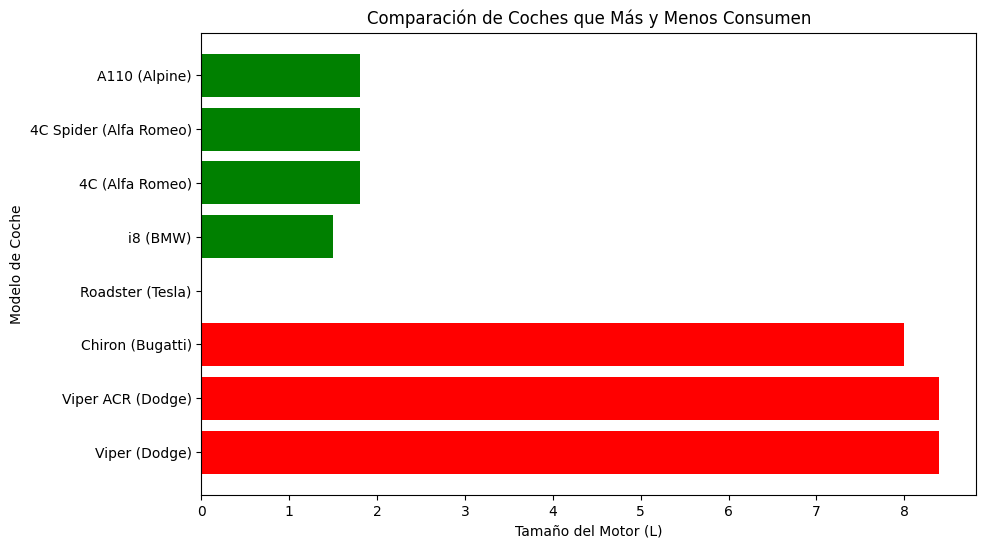

In [52]:
plt.figure(figsize=(10, 6))
coches_consumo = pd.concat([coches_mas_consumen, coches_menos_consumen])

plt.barh(coches_consumo["Car Model"] + " (" + coches_consumo["Car Make"] + ")", 
         coches_consumo["Engine Size (L)"], color=['red']*10 + ['green']*10)

plt.xlabel("Tamaño del Motor (L)")
plt.ylabel("Modelo de Coche")
plt.title("Comparación de Coches que Más y Menos Consumen")

plt.show()


In [54]:
df_2020 = df[df['Year'] == 2020]

coche_mas_caro_2020 = df_2020.nlargest(1, 'Price (in USD)')
coche_mas_barato_2020 = df_2020.nsmallest(1, 'Price (in USD)')

coches_extremos_2020 = pd.concat([coche_mas_caro_2020, coche_mas_barato_2020])

print("Coche Más Caro y Más Barato del 2020:")
print(coches_extremos_2020)


Coche Más Caro y Más Barato del 2020:
    Car Make   Car Model  Year  Engine Size (L) Horsepower Torque (lb-ft)  \
166   Pagani      Huayra  2020              6.0        720            738   
779   Nissan  370Z Coupe  2020              3.7        332            270   

     0-60 MPH Time (seconds)  Price (in USD)  
166                      3.0         2700000  
779                      5.0           30090  
